<a href="https://colab.research.google.com/github/supratim58/Handwritten_Digit_Recognition_using_Artificial_Neural_Network/blob/main/Handwritten_Digit_Recognition_using_ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Handwritten Digit Recognition using Artificial Neural Network

In [ ]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [ ]:
(X_train, Y_train), (X_test, Y_test)=keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
len(X_train)

60000

In [ ]:
len(X_test)

10000

In [ ]:
X_train=X_train/255
X_test=X_test/255

In [ ]:
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [ ]:
X_train[1].shape

(28, 28)

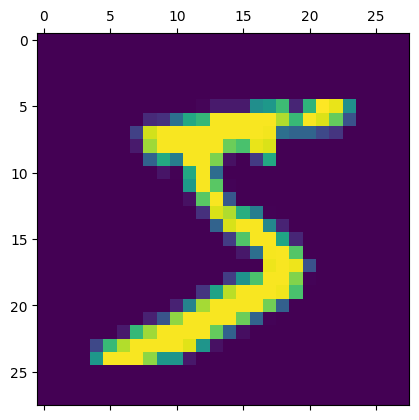

In [ ]:
plt.matshow(X_train[0])

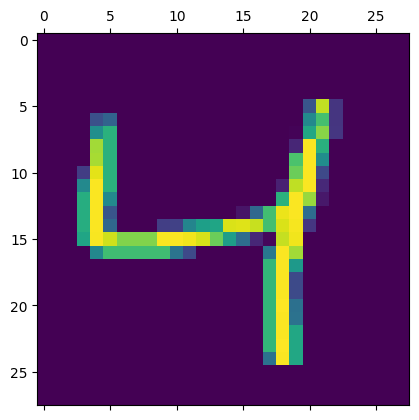

In [ ]:
plt.matshow(X_train[2])

In [ ]:
Y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [ ]:
X_train_flattened=X_train.reshape(len(X_train),28*28)
X_test_flattened=X_test.reshape(len(X_test),28*28)

In [ ]:
X_train_flattened.shape

(60000, 784)

In [ ]:
X_test_flattened.shape

(10000, 784)

In [ ]:
model=keras.Sequential([keras.layers.Dense(10,input_shape=(784,),activation='sigmoid')])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',metrics='accuracy')
model.fit(X_train_flattened, Y_train, epochs=15)

Epoch 1/15
1875/1875 [==============================] - 3s 1ms/step - loss: 0.4767 - accuracy: 0.8742
Epoch 2/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3043 - accuracy: 0.9158
Epoch 3/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2841 - accuracy: 0.9206
Epoch 4/15
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2735 - accuracy: 0.9236
Epoch 5/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2664 - accuracy: 0.9261
Epoch 6/15
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2623 - accuracy: 0.9275
Epoch 7/15
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2583 - accuracy: 0.9284
Epoch 8/15
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2550 - accuracy: 0.9291
Epoch 9/15
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2529 - accuracy: 0.9301
Epoch 10/15
1875/1875 [==============================] - 2s 1ms/step - loss: 0.251

In [ ]:
model.evaluate(X_test_flattened, Y_test)

313/313 [==============================] - 0s 951us/step - loss: 0.2687 - accuracy: 0.9259


[0.26865410804748535, 0.9258999824523926]

In [ ]:
y=model.predict(X_test_flattened)

313/313 [==============================] - 0s 877us/step


In [ ]:
y[0]

array([7.5932255e-04, 1.1265963e-09, 4.0980177e-03, 9.6347916e-01,
       1.0912056e-03, 1.2675269e-01, 1.8489952e-09, 9.9987537e-01,
       6.2298667e-02, 6.3438940e-01], dtype=float32)

In [ ]:
np.argmax(y[0])

7

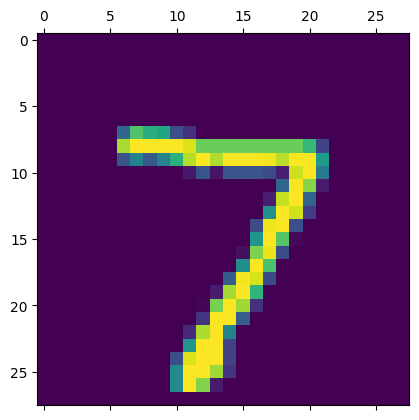

In [ ]:
plt.matshow(X_test[0])

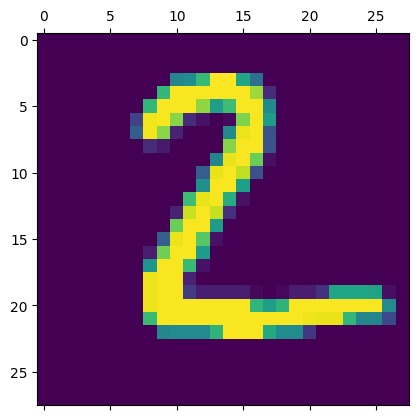

In [ ]:
plt.matshow(X_test[1])

In [ ]:
np.argmax(y[1])

2

In [ ]:
y_predicted=[np.argmax(i) for i in y]
y_predicted[:10]

[7, 2, 1, 0, 4, 1, 4, 9, 6, 9]

In [ ]:
tf.math.confusion_matrix(labels=Y_test,predictions=y_predicted)

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 961,    0,    2,    2,    0,    7,    4,    3,    1,    0],
       [   0, 1108,    4,    3,    0,    1,    3,    2,   14,    0],
       [   7,    9,  925,   18,    7,    3,   10,   10,   40,    3],
       [   3,    0,   16,  931,    1,   24,    2,    9,   17,    7],
       [   1,    1,    5,    2,  923,    0,    6,    4,    9,   31],
       [   8,    2,    1,   37,   10,  780,   13,    8,   28,    5],
       [  14,    3,    8,    1,    7,   16,  906,    1,    2,    0],
       [   2,    6,   22,    8,    6,    1,    0,  950,    2,   31],
       [   9,    6,    5,   28,    9,   29,   10,   11,  857,   10],
       [  11,    7,    1,    9,   32,    6,    0,   19,    6,  918]],
      dtype=int32)>

In [ ]:
model2=keras.Sequential([keras.layers.Dense(115,input_shape=(784,),activation='relu'), keras.layers.Dense(10,activation='sigmoid')])
model2.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')
model2.fit(X_train_flattened, Y_train, epochs=15)

Epoch 1/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2653 - accuracy: 0.9234
Epoch 2/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1198 - accuracy: 0.9648
Epoch 3/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0822 - accuracy: 0.9754
Epoch 4/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0631 - accuracy: 0.9807
Epoch 5/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0489 - accuracy: 0.9857
Epoch 6/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0388 - accuracy: 0.9882
Epoch 7/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0316 - accuracy: 0.9900
Epoch 8/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0244 - accuracy: 0.9927
Epoch 9/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0212 - accuracy: 0.9934
Epoch 10/15
1875/1875 [==============================] - 3s 2ms/step - loss: 0.017

In [ ]:
model2.evaluate(X_test_flattened,Y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.1072 - accuracy: 0.9744


[0.10718826949596405, 0.974399983882904]

In [ ]:
model2=keras.Sequential([keras.layers.Flatten(input_shape=(28,28)), keras.layers.Dense(115,activation='relu'), keras.layers.Dense(10, activation='sigmoid')])
model2.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')
model2.fit(X_train,Y_train,epochs=15)

Epoch 1/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2657 - accuracy: 0.9251
Epoch 2/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1211 - accuracy: 0.9646
Epoch 3/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0845 - accuracy: 0.9753
Epoch 4/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0643 - accuracy: 0.9804
Epoch 5/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0503 - accuracy: 0.9847
Epoch 6/15
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0392 - accuracy: 0.9883
Epoch 7/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0320 - accuracy: 0.9898
Epoch 8/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0260 - accuracy: 0.9923
Epoch 9/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0216 - accuracy: 0.9937
Epoch 10/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.017

In [ ]:
model2.evaluate(X_test,Y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.1107 - accuracy: 0.9721


[0.11069949716329575, 0.972100019454956]